# Project 2

Author : Behrad Binaei Haghighi


Student ID 810101392

In [2]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from google.colab import drive
drive.mount("/content/drive")
d = "/content/drive/MyDrive/project2_BehradBinaei_810101392/"

MessageError: Error: credential propagation was unsuccessful

## Outline:
### What is Hierarchical Clustering and Density-Based Spatial?



Clustering analysis or simply Clustering is basically an Unsupervised learning method that divides the data points into a number of specific batches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense. It comprises many different methods based on differential evolution.


K-Means Clustering is a powerful discover groups in data, but there are some disadvantages:
 - We must tune 'k' hyperparameter.
 - The grouping algorithm is so simple and it doen't consider so many complex ways.
 - It is nondeterministic. The solution it finds will depend on the initialization.

**Hierarchical Clustering is the solution for these shortcomings.**

The two main approaches for Hierarchical Clustering:
  - 1) **Hierarchical agglomerative clustering (HAC)** : starts at the bottom, with every datum in its own singleton cluster, and merges groups together.
  - 2) **Hierarchical divisive clustering** : starts with all of the data in one big group and then chops it up until every
datum is in its own singleton group.


In here we only discuss about Hierarchical agglomerative clustering.

Source: Hierarchical Clustering/Ryan P. Adams/COS 324 – Elements of Machine Learning/Princeton University

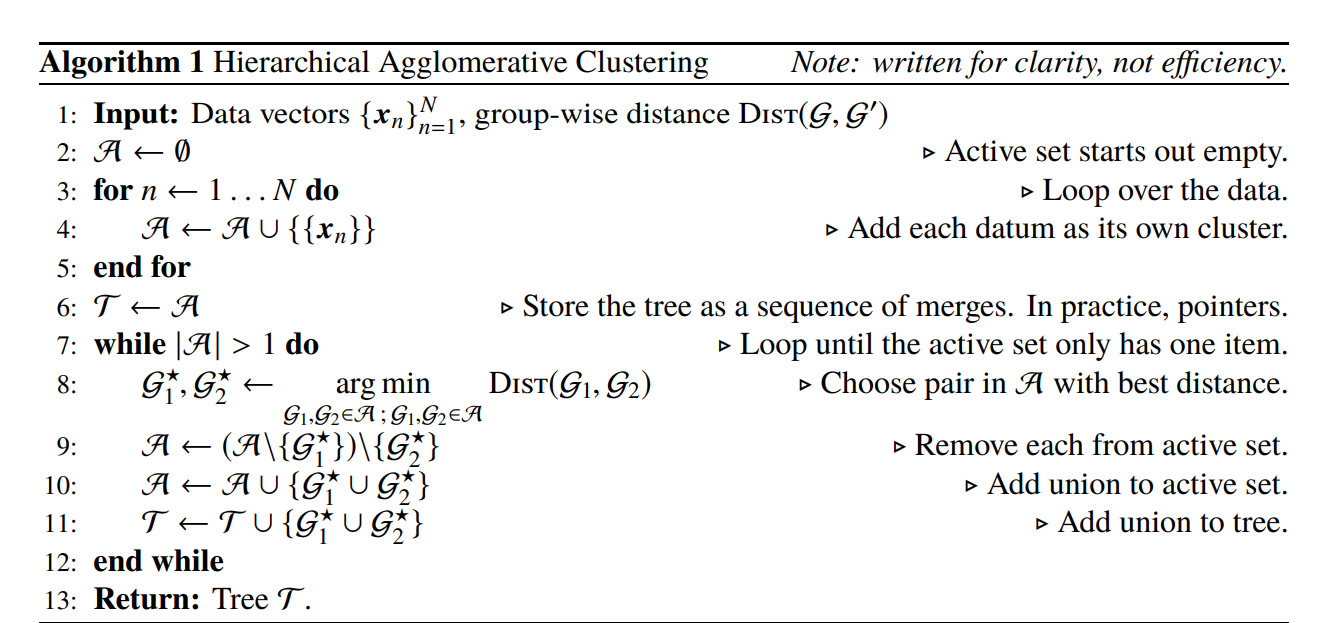

In [ ]:
Image(filename= d+'images/Hclustering_algorithm.png', width=800, height=600)
# Source: Hierarchical Clustering/Ryan P. Adams/COS 324 – Elements of Machine Learning/Princeton University

We’ll follow the steps below to perform agglomerative hierarchical clustering using R software:

- 1) Preparing the data
- 2) Computing (dis)similarity information between every pair of objects in the data set.
- 3) Using linkage function to group objects into hierarchical cluster tree, based on the distance information generated at step 1 Objectsclusters that are in close proximity are linked together using the linkage function.
- 4) Determining where to cut the hierarchical tree into clusters. This creates a partition of the data.


## Linkages
There are four main types of linkages.

1. **Single-Linkage Criterion**:
   - The distance between two clusters is determined by the closest pair of elements (one from each cluster):

    $
      D(X, Y) = \min_{x \in X, y \in Y} d(x, y)
    $

2. **Complete-Linkage Criterion** (also known as farthest neighbor clustering):
   - The distance between two clusters is determined by the farthest pair of elements (one from each cluster):

    $
      D(X, Y) = \max_{x \in X, y \in Y} d(x, y)
    $

3. **Average-Linkage Criterion**:
   - The distance between two clusters is the average of all pairwise distances between their elements:

    $   
     D(X, Y) = \frac{1}{|X| \cdot |Y|} \sum_{x \in X} \sum_{y \in Y} d(x, y)
    $

4. **Centroid Criterion**:
   - The distance between two clusters is based on the centroids (mean vectors) of the clusters:
   
    $
     D(X, Y) = d(\text{centroid}_X, \text{centroid}_Y)
    $


5. **Ward Linkage Criterion:**

   - The distance between two clusters is determined by the increase in the total within-cluster variance after merging the clusters. This method minimizes the total within-cluster variance at each step. Specifically, the Ward linkage criterion aims to find pairs of clusters that minimize the following equation when merged:

   $
   D(X, Y) = \sqrt{\frac{2 \cdot |X| \cdot |Y|}{|X| + |Y|}} \cdot d(\text{centroid}_X, \text{centroid}_Y)
   $

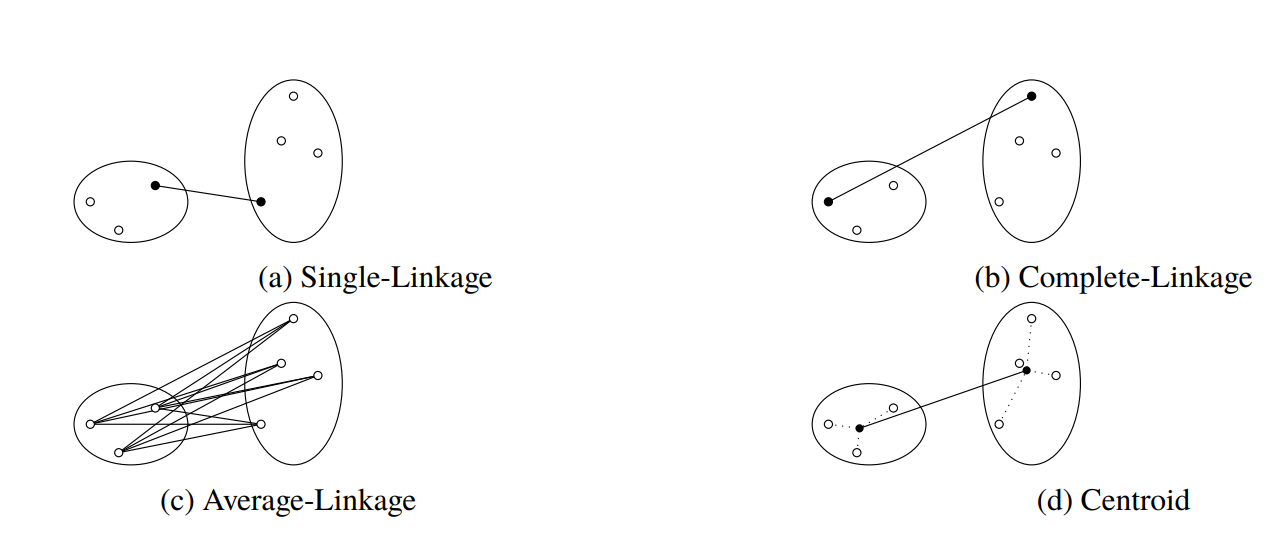

In [ ]:
Image(filename= d+'images/Hclustering_linkage.png', width=800, height=600)
# Source: Hierarchical Clustering/Ryan P. Adams/COS 324 – Elements of Machine Learning/Princeton University

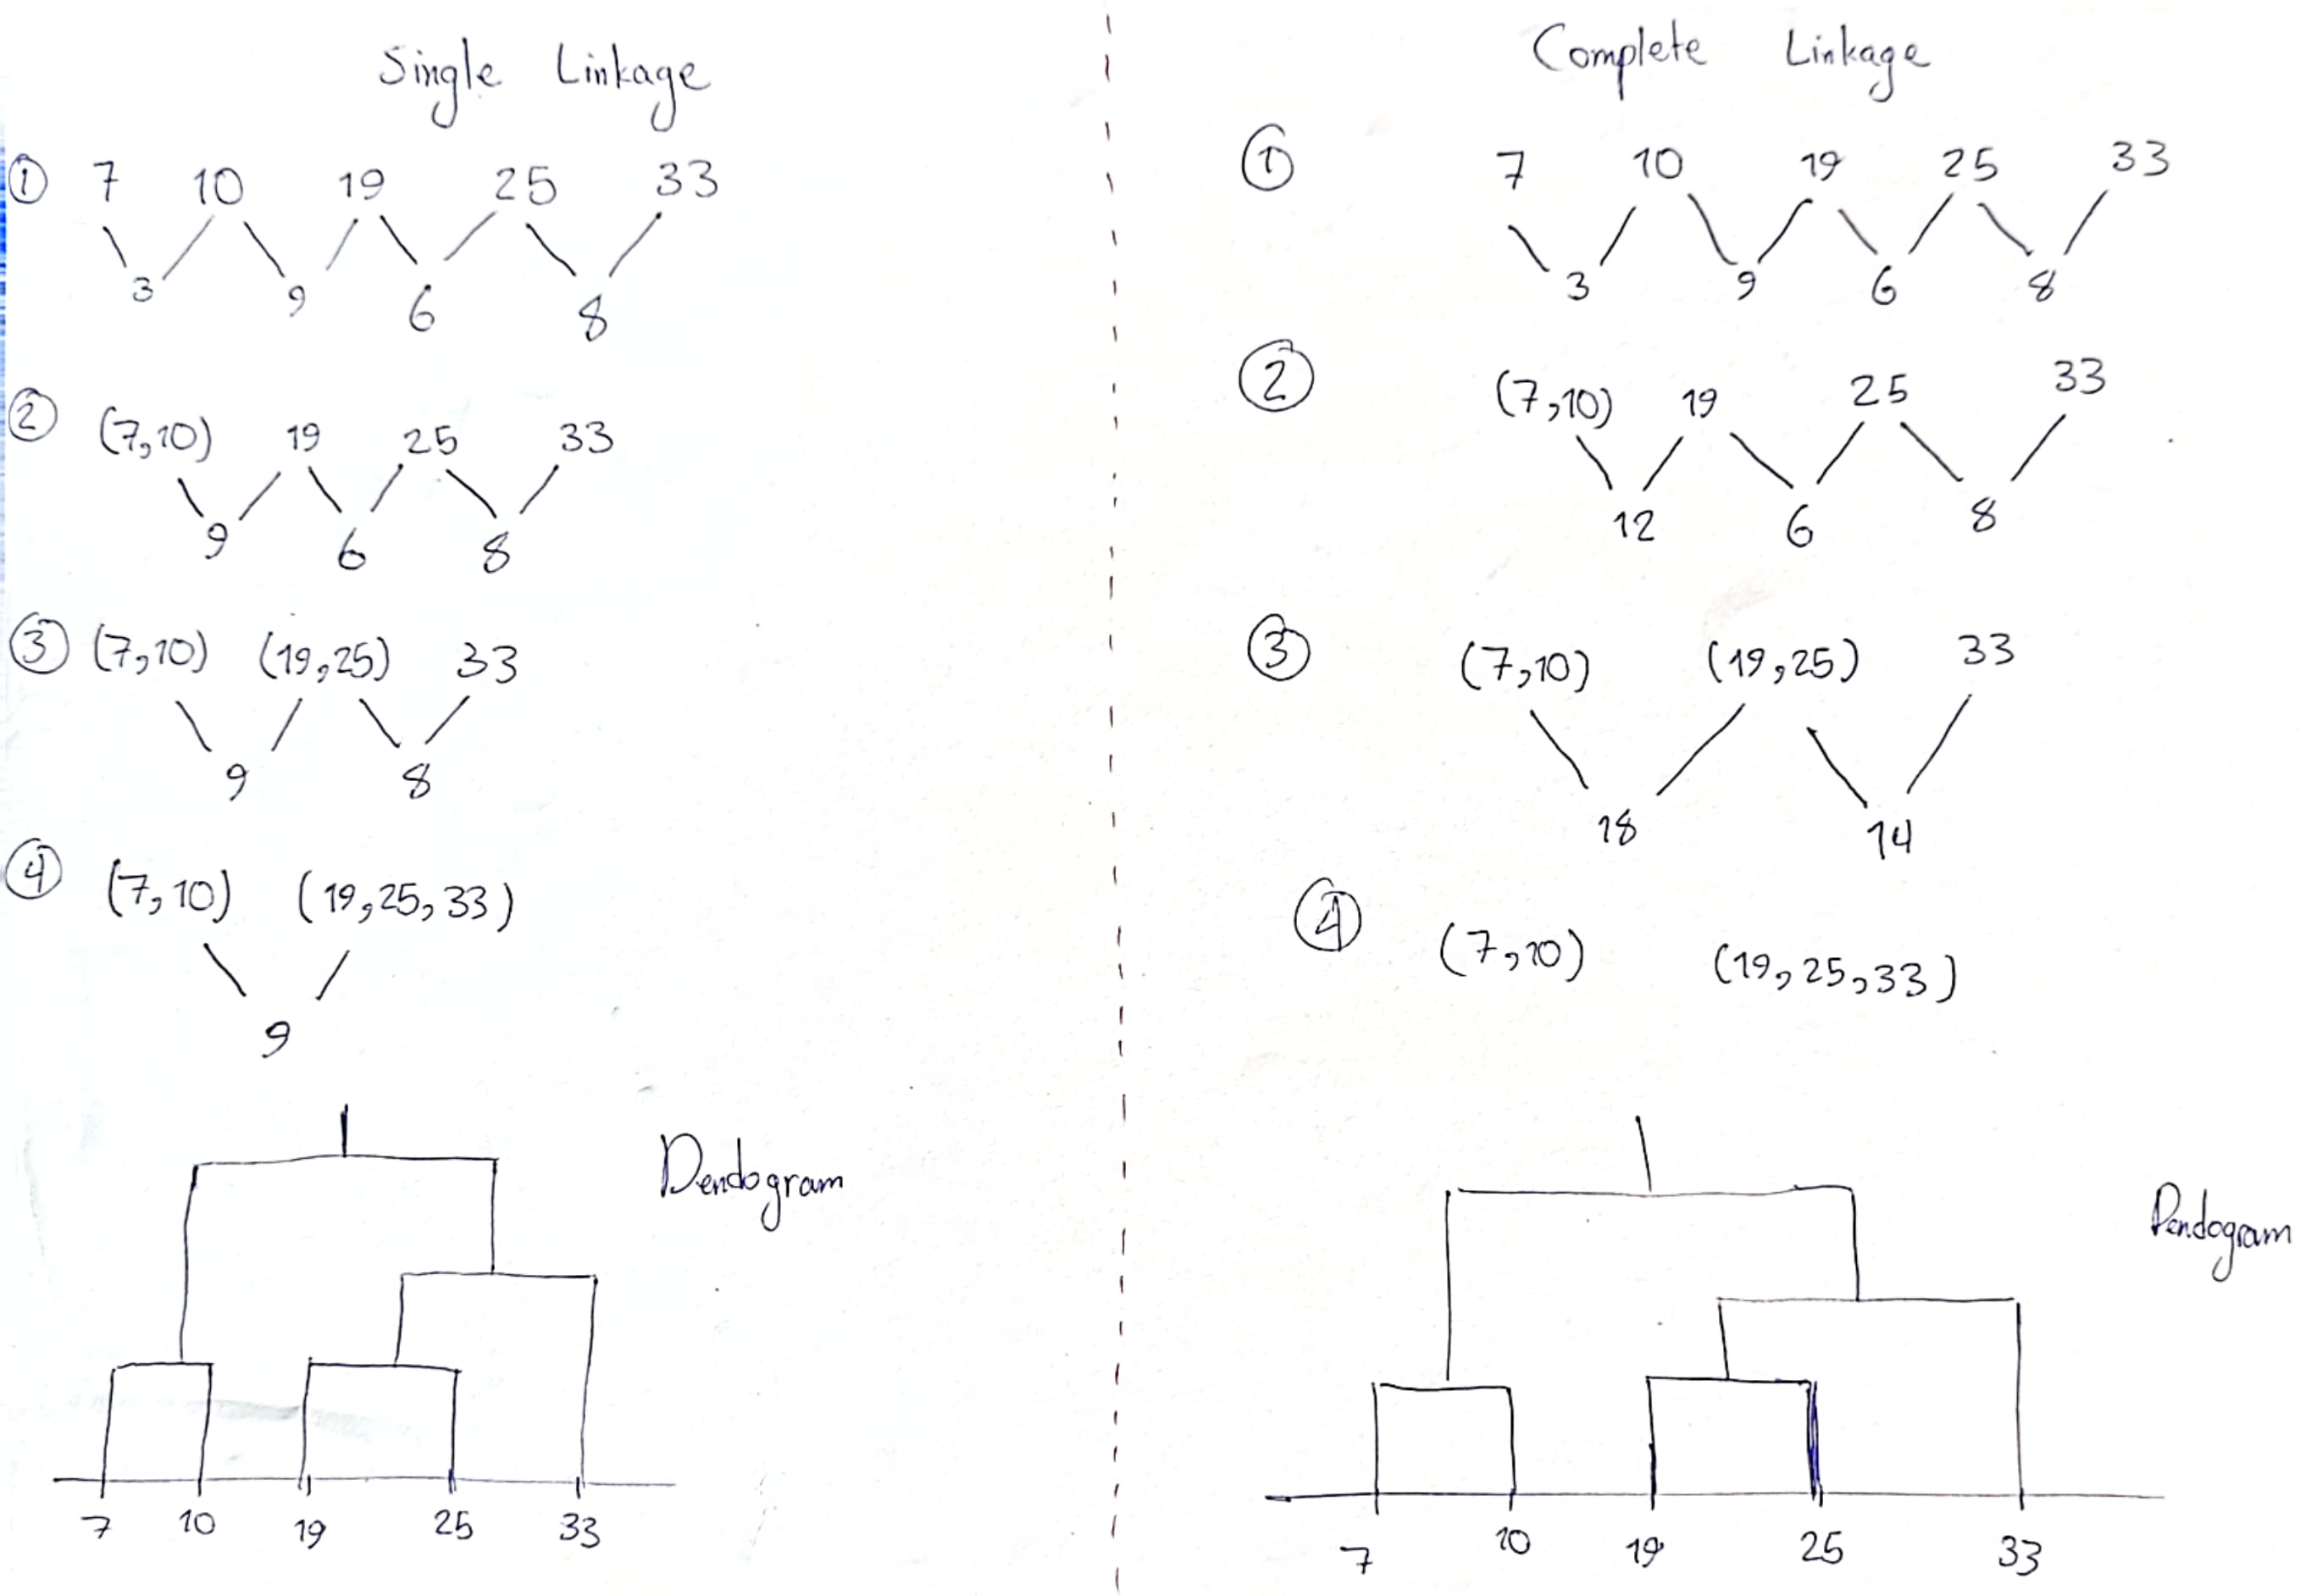

In [ ]:
Image(filename= d+'images/linkage_examples.jpg', width=800, height=600)

## Density-Based Spatial Clustering

### Overview
- An unsupervised machine learning algorithm to cluster datapoints based on similar characteristics.

### Advantages
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm with several advantages:

1. **Identification of Arbitrary-Shaped Clusters**:
   DBSCAN can find clusters of arbitrary shape and size, which makes it particularly useful for datasets where clusters are not spherical or have irregular boundaries.

2. **Noise and Outlier Detection**:
   DBSCAN identifies outliers as noise, instead of classifying them into a cluster.

3. **No Need to Specify the Number of Clusters**:
   Unlike k-means, DBSCAN does not require the user to specify the number of clusters in advance. The algorithm determines the appropriate number of clusters based on the density of points.

4. **Minimal Parameter Tuning**:
   DBSCAN requires only two parameters.

### Parameters 0f DBSCAN

1. **eps (ε - Epsilon)**:
   - Definition: `eps` is the maximum distance between two points for one to be considered as in the neighborhood of the other. This distance threshold determines the radius of a neighborhood with respect to some point.
   - Impact: A smaller `eps` value will result in more clusters with fewer points, potentially treating some closely related points as noise. Conversely, a larger `eps` value will merge more points into a single cluster and may not effectively capture the underlying structure, leading to fewer and larger clusters.

2. **min_samples**:
   - Definition: `min_samples` is the minimum number of points required to form a dense region (including the point itself). This parameter sets the minimum size of a cluster.
   - Impact: A smaller `min_samples` value will make the algorithm more sensitive to noise and may form clusters with fewer points. A larger `min_samples` value will create clusters with more points, potentially overlooking smaller, meaningful clusters and treating them as noise.

**Choosing `eps` and `min_samples`**:
   - The values of `eps` and `min_samples` depend on the data distribution. There is no universal rule for setting these parameters; they often require empirical tuning or domain knowledge.

### Algorithm of DBSCAN
In this algorithm, we have 3 types of data points.
1. **Core Point**      : A point which has more neighbours than min_samples within eps raduis.
2. **Border Point**    : It has fewer neighbours than min_samples threshold within eps but it is in the neighborhood of a core point.
3. **Noise or outlier**: It is neither a core point nor border point.

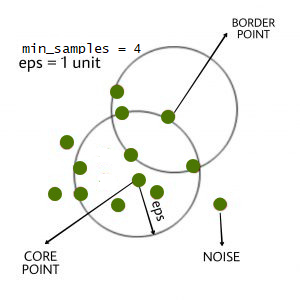

In [ ]:
Image(filename= d+'images/pointtypesdbscan.png', width=300, height=300)

Steps Used In DBSCAN Algorithm
1. Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.
2. For each core point if it is not already assigned to a cluster, create a new cluster.
3. Find recursively all its density-connected points and assign them to the same cluster as the core point.
A point a and b are said to be density connected if there exists a point c which has a sufficient number of points in its neighbors and both points a and b are within the eps distance. This is a chaining process. So, if b is a neighbor of c, c is a neighbor of d, and d is a neighbor of e, which in turn is  neighbor of a implying that b is a neighbor of a.
4. Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.

Let's apply the DBSCAN algorithm step-by-step to a simple numerical example with 10 points using a single feature. We'll use the parameters `eps` (ε) and `min_samples` (MinPts).

**Example Data Points** (single feature values):
```
[1, 2, 2, 8, 8, 25, 26, 25, 25, 27]
```

**DBSCAN Parameters**:
- `eps` = 3
- `min_samples` = 3

**Steps Used In DBSCAN Algorithm**:

1. **Find all the neighbor points within `eps` and identify the core points or visited with more than `min_samples` neighbors**:
    - Calculate the distance matrix (using absolute difference for simplicity):
    ```
    Distance Matrix:
       0  1  2  3  4  5  6  7  8  9
    0 [0, 1, 1, 7, 7, 24, 25, 24, 24, 26]
    1 [1, 0, 0, 6, 6, 23, 24, 23, 23, 25]
    2 [1, 0, 0, 6, 6, 23, 24, 23, 23, 25]
    3 [7, 6, 6, 0, 0, 17, 18, 17, 17, 19]
    4 [7, 6, 6, 0, 0, 17, 18, 17, 17, 19]
    5 [24, 23, 23, 17, 17, 0, 1, 0, 0, 2]
    6 [25, 24, 24, 18, 18, 1, 0, 1, 1, 1]
    7 [24, 23, 23, 17, 17, 0, 1, 0, 0, 2]
    8 [24, 23, 23, 17, 17, 0, 1, 0, 0, 2]
    9 [26, 25, 25, 19, 19, 2, 1, 2, 2, 0]
    ```
    - Core points determination based on `min_samples`:
        - Point 0 (1): Neighbors within `eps`: [1, 2]
        - Point 1 (2): Neighbors within `eps`: [0, 2]
        - Point 2 (2): Neighbors within `eps`: [0, 1]
        - Point 3 (8): Neighbors within `eps`: [4]
        - Point 4 (8): Neighbors within `eps`: [3]
        - Point 5 (25): Neighbors within `eps`: [6, 7, 8]
        - Point 6 (26): Neighbors within `eps`: [5, 7, 8, 9]
        - Point 7 (25): Neighbors within `eps`: [5, 6, 8]
        - Point 8 (25): Neighbors within `eps`: [5, 6, 7]
        - Point 9 (27): Neighbors within `eps`: [6]

    Core points (having at least `min_samples` neighbors within `eps`): 0, 1, 2, 5, 6, 7, 8

2. **For each core point if it is not already assigned to a cluster, create a new cluster**:
    - Start with Point 0 (1):
      - New Cluster: [0, 1, 2] (neighbors: 1, 2)
    - Point 1 and Point 2 are already in the cluster.

    - Next unvisited core point: Point 5 (25):
      - New Cluster: [5, 6, 7, 8, 9] (neighbors: 6, 7, 8, 9)
    - Point 6, 7, 8, and 9 are now in the cluster.

3. **Find recursively all its density-connected points and assign them to the same cluster as the core point**:
    - All core points from Step 1 have been visited and assigned to clusters.

4. **Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise**:
    - Points 3 and 4 are not part of any cluster and do not satisfy `min_samples`. Hence, they are considered noise.

**Result**:
- Cluster 1: [0, 1, 2]
- Cluster 2: [5, 6, 7, 8, 9]
- Noise: [3, 4]



### Comparing the hand-calculated result with sklearn DBSCAN model result

In [3]:
# Example data
data = np.array([1, 2, 2, 8, 8, 25, 26, 25, 25, 27]).reshape(-1, 1)

# DBSCAN model
db = DBSCAN(eps=3, min_samples=3).fit(data)

# Cluster labels
labels = db.labels_
print("Labels:", labels)

# Extract clusters and noise
clusters = {label: [] for label in set(labels) if label != -1}
noise = []

for idx, label in enumerate(labels):
    if label == -1:
        noise.append(data[idx][0])
    else:
        clusters[label].append(data[idx][0])

print("Clusters:", clusters)
print("Noise:", noise)


Labels: [ 0  0  0 -1 -1  1  1  1  1  1]
Clusters: {0: [1, 2, 2], 1: [25, 26, 25, 25, 27]}
Noise: [8, 8]


## Comparing 3 algorithms K-Means, DBSCAN and Hierarchical Clustering performance on the given dataset.

### About the dataset

The dataset has the following features.  

1. **AGE**: There are six age categories, where 1 represents an age less than 35 and 6 represents an age more than 75.
2. **EDUC**: There are four education categories, where 1 represents no high school, and 4 represents a college degree.
3. **MARRIED**: There are two categories to represent marital status, where 1 represents married, and 2 represents unmarried.
4. **OCCAT**: This represents the occupation category. A value of 1 represents managerial status, and 4 represents unemployed.
5. **KIDS**: Number of children.

6. **WSAVED**: This represents the individual's spending versus income, split into three categories. For example, 1 represents spending exceeded income.

7. **NWCAT**:This represents the net worth category. There are five categories, where 1 represents net worth less than the 25th percentile, and 5 represents net worth more than the 90th percentile.

8. **INCCL**: This represents the income category. There are five categories, where 1 represents income less than 10,000 USD, and 5 represents income more than 100,000 USD.

9. **RISK**: This represents the willingness to take risk on a scale of 1 to 4, where 1 represents the highest level of willingness to take risk.

10. **LIFECYCL**:This lifecycle variable approximates a person's ability to take on risk. There are six categories for increasing the level of ability to take risk. A value of 1 represents "age under 55, not married, and no kids," and a value of 6 represents "age over 55 and not working."
11. **HHOUSES**: This is a flag indicating whether the individual is a homeowner. A value of 1 (0) implies the individual does (does not) own a home.

12. **SPENDMOR**: This represents higher spending preference if assets are appreciated on a scale of 1 to 5.

### Load and preprocess the dataset

In [ ]:
data = pd.read_csv(d+'people_info.csv')

#### One Hot encoding

In [ ]:
data = data.drop('ID', axis=1)
categorical_columns = ['AGE', 'EDUC', 'MARRIED', 'OCCAT', 'WSAVED', 'NWCAT', 'INCCL', 'RISK', 'LIFECL', 'HHOUSES', 'SPENDMOR']
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(data[categorical_columns]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([data, encoded_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)


### KMeans Clustering

#### Determine the optimal number of clusters using the Elbow Method
The elbow method is a graphical representation of finding the optimal ‘K’ in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

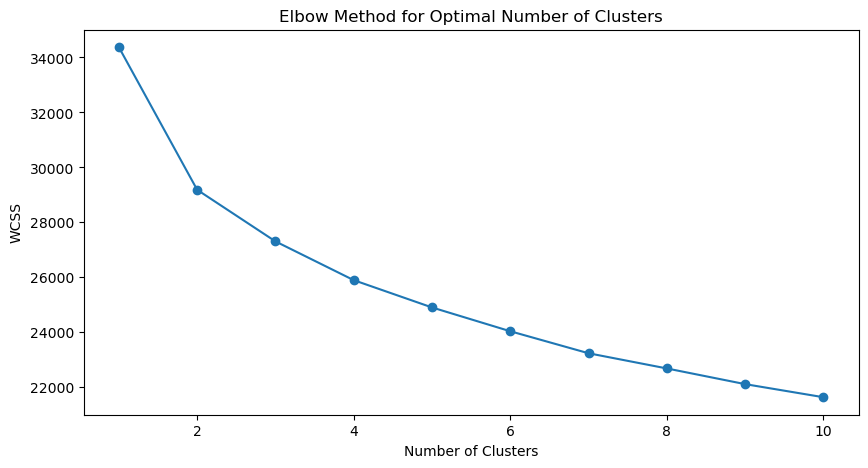

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


The optimal number of cluster is 2.

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(data)
data['KMeans_Labels'] = kmeans_labels

### Apply Hierarchical Clustering

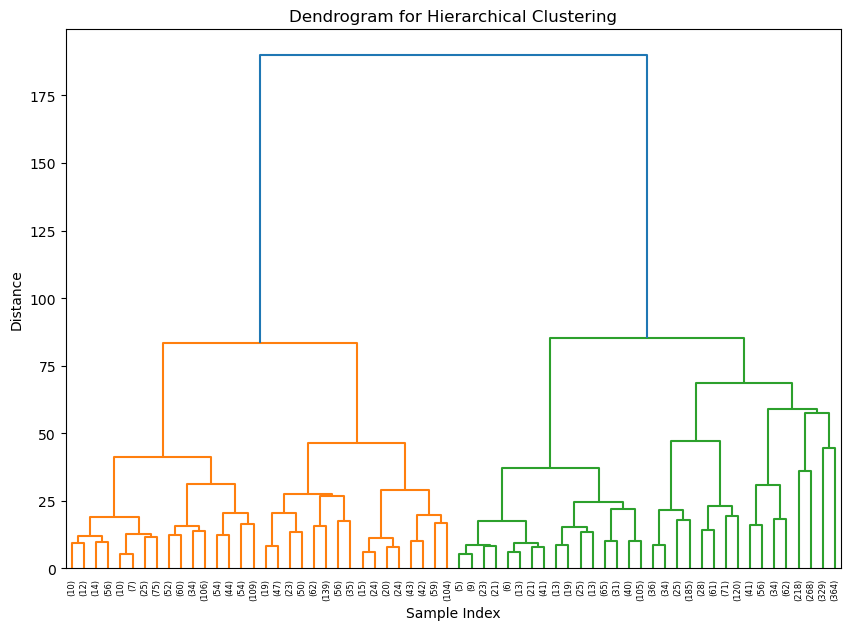

c:\Users\behra\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# Create the linkage matrix
linked = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data)
data['Hierarchical_Labels'] = hierarchical_labels

### Apply DBSCAN

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=4)
dbscan_labels = dbscan.fit_predict(df_encoded)
data['DBSCAN_Labels'] = dbscan_labels

### Comparing the algorithm performances in our data

In [ ]:
kmeans_silhouette = silhouette_score(data, kmeans_labels)
hierarchical_silhouette = silhouette_score(data, hierarchical_labels)
dbscan_silhouette = silhouette_score(df_encoded, dbscan_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')

K-Means Silhouette Score: 0.27757254867024134
Hierarchical Clustering Silhouette Score: 0.19208854230233283
DBSCAN Silhouette Score: 0.4340121353063976


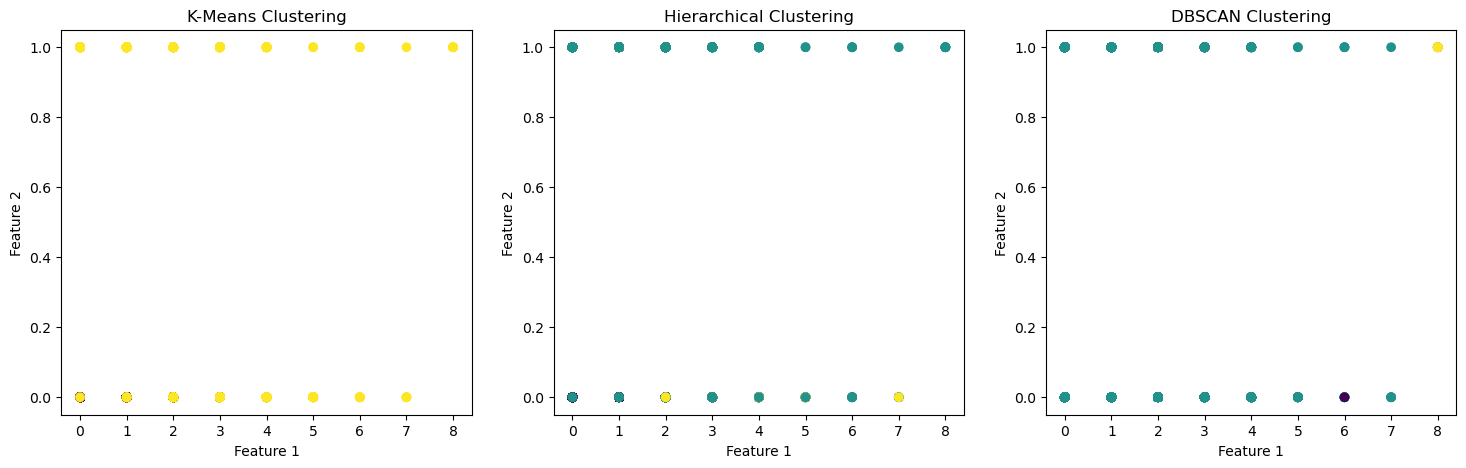

In [ ]:
# Visualize the clustering results
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=kmeans_labels, cmap='viridis')
axs[0].set_title('K-Means Clustering')

axs[1].scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=hierarchical_labels, cmap='viridis')
axs[1].set_title('Hierarchical Clustering')

axs[2].scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=dbscan_labels, cmap='viridis')
axs[2].set_title('DBSCAN Clustering')

for ax in axs:
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.show()

# Decision Tree and Random Forest

### In this notebook we cover these topics

#### 1. What is Decision Tree and Random Forest?
#### 2. Mathematical intuition behind splitting decision tree.
#### 3. Comparing Gini index and Entory performance on splitting tree.
#### 4. Comparing the Decision Tree and Random Forest performance on classification problems.
#### 5. Decision tree algorithm for solving regression problems.

In [ ]:
from IPython.display import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import tree

## What is Decision Tree and Random Forest?

### Decision Tree
Decision Tree is a supervised learning algorithm that mostly used for classifiacation problems. For exapmle predicting a shot in football will be in goal or not. The algorithm is based of splitting samples by considering a threshold or type of features.

A decision tree is a branching flow diagram or tree chart. It comprises of the following components:

. A target variable such as goal or not and its initial distribution.

1. A root node: this is the node that begins the splitting and has all the data.
2. Node purity: Decision nodes are typically impure, or a mixture of both classes of the target variable (0,1 or green and red dots in the image). Pure nodes are those that have one class — hence the term pure. They either have green or red dots only in the image.
3. Decision nodes: these are subsequent or intermediate nodes, where the target variable is again split further by other variables
4. Leaf nodes or terminal nodes are pure nodes. The splitting process ends in these nodes.

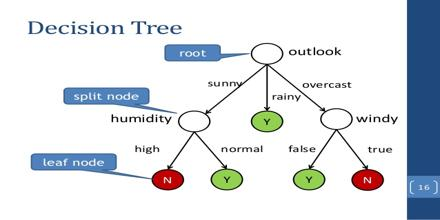

In [ ]:
Image(filename=d+'images/Decision-Tree-Learning.jpg', width=600, height=800)
#source: https://assignmentpoint.com/decision-tree-learning/

### Random Forest
The Random Forest algorithm is a powerful and versatile machine learning method used for classification, regression, and other tasks. It operates by constructing a multitude of decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. Here’s a detailed explanation of the algorithm:

#### How Random Forest Works

1. **Bootstrap Aggregation (Bagging):**
   - Random Forest builds multiple decision trees using different subsets of the training data. Each subset is created by randomly sampling the data with replacement (bootstrap sampling).
   - This means some samples will be repeated in the subset, while others will be left out (these are known as out-of-bag samples).

2. **Random Feature Selection:**
   - For each split in the decision tree, Random Forest selects a random subset of features. This randomness helps to create diverse trees.
   - By doing this, the algorithm ensures that the trees are less correlated, which improves the overall performance of the forest.

3. **Tree Construction:**
   - Each decision tree is constructed using the chosen subset of data and features. The tree is grown to the largest extent possible without pruning.
   - Each tree will likely overfit to its specific subset of data, but when combined with other trees, the overall model generalizes well.

4. **Voting/Averaging:**
   - For classification tasks, each tree in the forest votes for a class, and the class with the majority vote is chosen as the final prediction.
   - For regression tasks, the predictions of all trees are averaged to produce the final output.

## Mathematical intuition behind splitting decision tree.

There are various method to separate samples from eachother we delve into two main ways of it:
1. **Gini Impurity**
2. **Entropy**

### Gini Impurity
Gini impurity is a measure used in decision tree algorithms to quantify a dataset’s impurity level or disorder. In decision trees, it aids in selecting the optimal split by identifying features that result in more homogeneous subsets of data, ultimately contributing to the creation of accurate and reliable predictive models.

The mathematical definition of Gini Impurity for a dataset D containing samples from k classes:

$
Gini(D) = 1 - \sum_{i=1}^c p_i^2
$

$ p_i $ represents the probability of a sample belonging to class 'i' at a given node.
The Gini Impurity ranges from 0 to 0.5, where 0 indicates perfect purity (all samples belong to the same class), and 0.5 indicates maximum impurity (uniform class distribution).


#### Weighted Gini Index:


When there are more than two classes, we need to consider each class individually.The weighted Gini Index accounts for both class impurity and class weights.
Let , and .
The weighted Gini Index is defined as:

$ G_{\text{weighted}} = \sum_{i=1}^{n} w_i \cdot G_i $


- $G_i$ : The Gini Index for class i.
- n : The total number of classes
- $w_i$ : The weight assigned to class i

### Example
This is our very simple dataset. We want to construct the decision tree of it using gini index.

In [ ]:

data = {'gender' : ['M', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'F'],
        'size' :   ['medium', 'large','small','small','large', 'small','medium','small','small','medium'],
        'class':   ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']}

df = pd.DataFrame(data)
print(df)

  gender    size class
0      M  medium     A
1      M   large     B
2      M   small     A
3      F   small     B
4      M   large     A
5      F   small     B
6      M  medium     A
7      F   small     B
8      F   small     A
9      F  medium     B


#### Gini index for Gender Attribute

$
Gini(female) = 1 - \sum_{i=1}^c p_i^2 = 1 - ( \frac{4}{5})^2 - ( \frac{1}{5})^2 = 0.32
$


$
Gini(male) = 1 - \sum_{i=1}^c p_i^2 = 1 - ( \frac{1}{5})^2 - ( \frac{4}{5})^2 = 0.32
$


$
Gini(gender) = w_1 * Gini(male) + w_2 * Gini(female) =\frac{5}{10} * 0.32 + \frac{5}{10} * 0.32 = 0.32
$

#### Gini index for size Attribute

$
Gini(small) = 1 - \sum_{i=1}^c p_i^2 = 1 - ( \frac{2}{5})^2 - ( \frac{3}{5})^2 = 0.48
$


$
Gini(large) = 1 - \sum_{i=1}^c p_i^2 = 1 - ( \frac{1}{2})^2 - ( \frac{1}{2})^2 = 0.5
$

$
Gini(medium) = 1 - \sum_{i=1}^c p_i^2 = 1 - ( \frac{2}{3})^2 - ( \frac{1}{3})^2 = 0.44
$

$
Gini(gender) = w_1 * Gini(small) + w_2 * Gini(medium) + w_3 * Gini(large) =\frac{5}{10} * 0.48 + \frac{3}{10} * 0.44 + \frac{2}{10} * 0.5 = 0.472
$

From the above calculation, we observe that ‘gender’ has the lowest Gini Index and hence, it will be chosen as the root node for how the decision tree works.

In [ ]:
def gini_impurity(subset):
    total = len(subset)
    if total == 0:
        return 0
    count_A = len(subset[subset['class'] == 'A'])
    count_B = len(subset[subset['class'] == 'B'])
    p_A = count_A / total
    p_B = count_B / total
    return 1 - (p_A ** 2 + p_B ** 2)


def weighted_gini_impurity(df, feature):
    total = len(df)
    unique_values = df[feature].unique()
    weighted_gini = 0

    for value in unique_values:
        subset = df[df[feature] == value]
        weight = len(subset) / total
        gini = gini_impurity(subset)
        weighted_gini += weight * gini

    return weighted_gini

gini_gender = weighted_gini_impurity(df, 'gender')
gini_size = weighted_gini_impurity(df, 'size')

print(f'Weighted Gini Impurity for gender: {gini_gender}')
print(f'Weighted Gini Impurity for size: {gini_size}')

Weighted Gini Impurity for gender: 0.31999999999999984
Weighted Gini Impurity for size: 0.47333333333333333


## Comparing Gini index and Entory performance on splitting tree.

Using Entropy or the Gini Impurity Index in most decision tree applications leads to similar
results. That is said, the Gini Impurity Index is slightly faster to compute. However, when they
differ, the Gini Impurity Index tends to isolate the most frequent class in its own branch of the
tree, while entropy tends to produce slightly more balanced trees.

### Entroy overveiw:

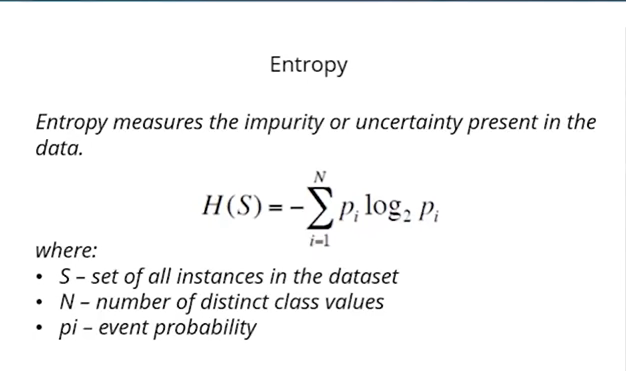

In [ ]:
Image(filename=d+'images/measure-entropy-decision-tree.png')
#source: https://snippetnuggets.com/interviewQuestions/machineLearning/basics/2020-machine-learning-entropy-information-gain-decisioin-tree.html

- A higher entropy value indicates a more heterogeneous dataset with diverse classes.
- Conversely, a lower entropy signifies a more pure and homogeneous subset of data.

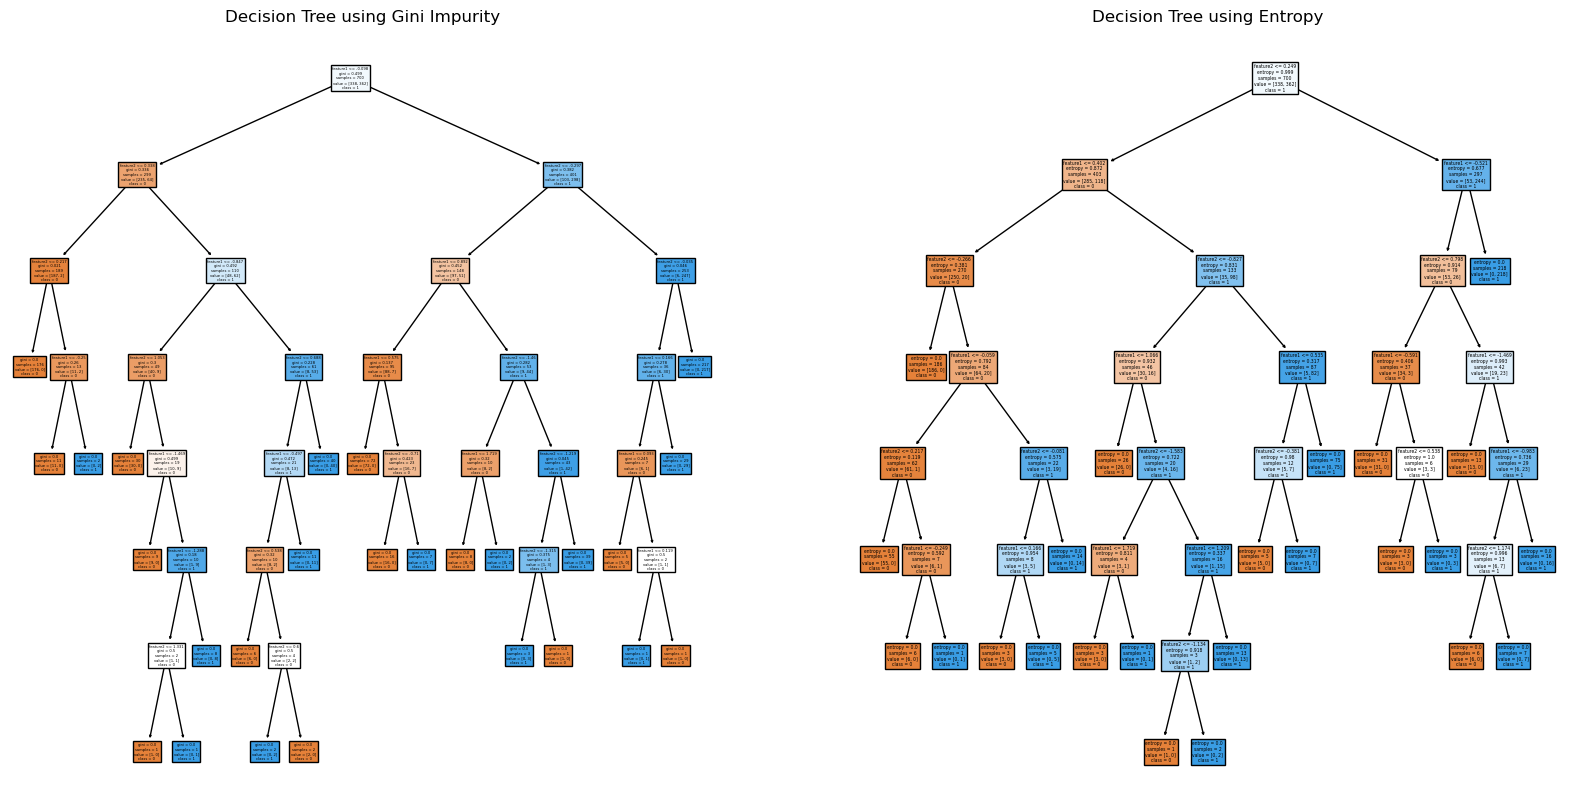

In [ ]:
# Generate synthetic data
np.random.seed(42)
X = np.random.randn(1000, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, 0)

# Create a dataframe
generated_data = pd.DataFrame(X, columns=['feature1', 'feature2'])
generated_data['target'] = y

X_train, X_test, y_train, y_test = train_test_split(generated_data[['feature1', 'feature2']], generated_data['target'], test_size=0.3, random_state=42)

# Train Decision Tree using Gini impurity
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Train Decision Tree using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# Plot the trees
plt.figure(figsize=(20, 10))
plt.subplot(121)
tree.plot_tree(clf_gini, filled=True, feature_names=['feature1', 'feature2'], class_names=['0', '1'])
plt.title("Decision Tree using Gini Impurity")

plt.subplot(122)
tree.plot_tree(clf_entropy, filled=True, feature_names=['feature1', 'feature2'], class_names=['0', '1'])
plt.title("Decision Tree using Entropy")

plt.show()

## Comparing the Decision Tree and Random Forest performance on classification problems.

In [ ]:
df = pd.read_csv(d+'Assignment 1-Dataset.csv')
df = df.dropna(axis=1, how='all')

X = df.drop(['Target'], axis=1)
y = df['Target']

### Split the data into training and testing sets
We already load the dataset.In here we just split the dataset into training and testing sets using an 80-20 split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build and train the models
We initialize a RandomForestClassifier with 100 trees and a random seed.

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate the models

In [ ]:
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

print("Decision Tree Classification labels:\n", dt_predictions)
print("Random Forest Classification labels:\n", rf_predictions)

Decision Tree Classification labels:
 [2 1 0 ... 0 0 0]
Random Forest Classification labels:
 [2 1 2 ... 0 0 0]


### Classification Reports

- **F1 score** :metric that measures the accuracy of a binary classification model by combining the precision and recall.
- **Precision**: is the fraction of true positives among the predicted positives.
- **recall** :is the fraction of true positives among the actual positives.

The F1 score is the harmonic mean of precision and recall. The F1 score ranges from 0 to 1, with 1 being the best and 0 being the worst.

In [ ]:
dt_classification_report = classification_report(y_test, dt_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

print("Decision Tree Classification Report:\n", dt_classification_report)
print("Random Forest Classification Report:\n", rf_classification_report)


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70     11504
           1       0.62      0.63      0.63      3581
           2       0.63      0.62      0.63      7176

    accuracy                           0.67     22261
   macro avg       0.65      0.65      0.65     22261
weighted avg       0.67      0.67      0.67     22261

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75     11504
           1       0.67      0.66      0.67      3581
           2       0.69      0.61      0.65      7176

    accuracy                           0.70     22261
   macro avg       0.69      0.68      0.69     22261
weighted avg       0.70      0.70      0.70     22261



### Conclusion
Typically, Random Forest models perform better due to their ensemble nature, which reduces overfitting and improves generalization compared to a single Decision Tree

## Decision tree algorithm for solving regression problems with example using Boston Housing Dataset.

### Explanation


#### Defenition
A regression tree is basically a decision tree that is used for the task of regression which can be used to predict continuous valued outputs instead of discrete outputs.

#### Mean Square Error

In Decision Trees for Classification, we saw how the tree asks right questions at the right node in order to give accurate and efficient classifications. The way this is done in Classification Trees is by using 2 measures , namely Entropy and Information Gain. But since we are predicting continuous variables, we cannot calculate the entropy and go through the same process. We need a different measure now. A measure that tells us how much our predictions deviate from the original target and that’s the entry-point of mean square error.



$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$
Where:
- n is the number of observations.
- $ y_i $ is the actual value.
- $ \hat{y}_i $ is the predicted value.

This formula calculates the average of the squares of the errors, which are the differences between the actual and predicted values.

### Building Decision Tree and Random Forest Regression Models on the Boston Housing Dataset

In [ ]:
boston = pd.read_csv(d+"HousingData.csv")
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


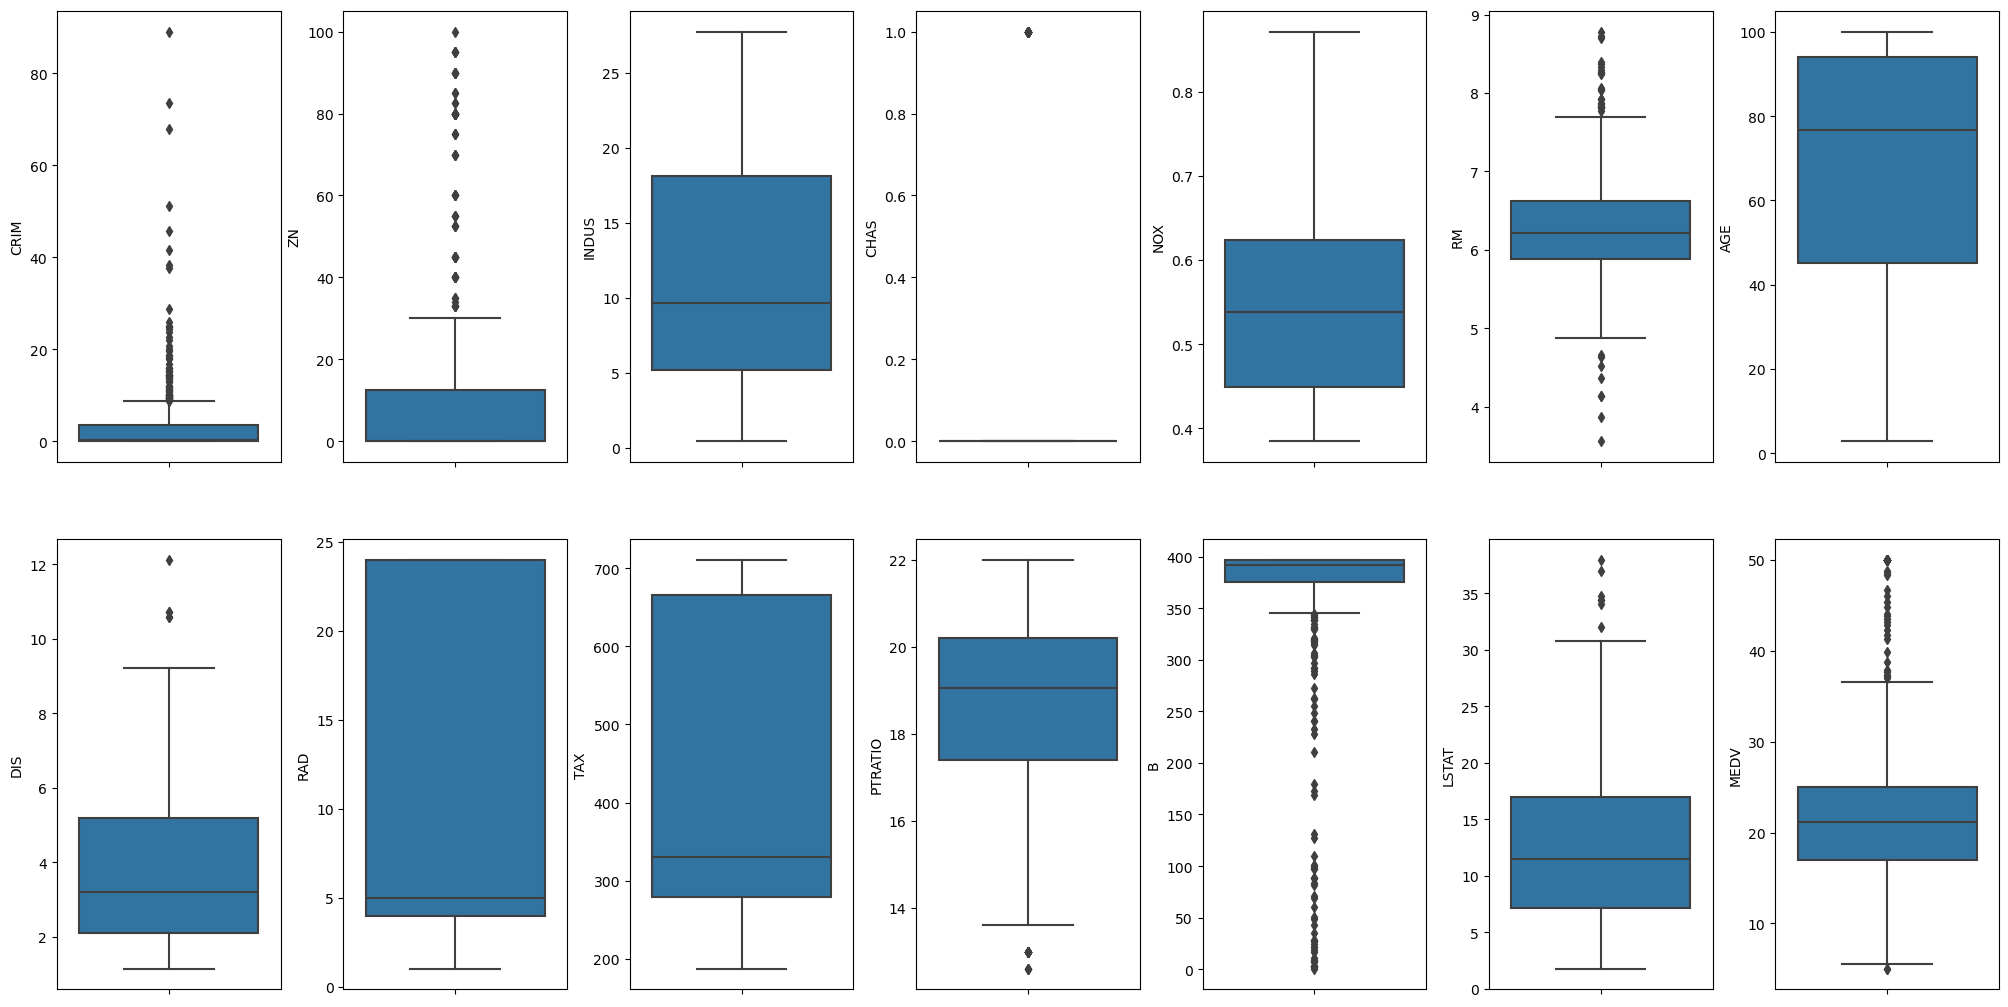

In [ ]:

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()


for k, v in boston.items():
    sns.boxplot(y=k, data=boston, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [ ]:
def print_outliers_prop(dataset):
    outliers = {}
    for k, v in dataset.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(dataset)[0]
        outliers[k] = perc

    # Sort the dictionary by percentage (high to low)
    sorted_outliers = {k: v for k, v in sorted(outliers.items(), key=lambda item: item[1], reverse=True)}

    # Print the sorted percentages
    for k, perc in sorted_outliers.items():
        print(f"Column {k} outliers = {perc:.2f}%")

print_outliers_prop(boston)

Column CHAS outliers = 96.05%
Column B outliers = 15.22%
Column CRIM outliers = 12.85%
Column ZN outliers = 12.45%
Column MEDV outliers = 7.91%
Column RM outliers = 5.93%
Column PTRATIO outliers = 2.96%
Column LSTAT outliers = 1.38%
Column DIS outliers = 0.99%
Column INDUS outliers = 0.00%
Column NOX outliers = 0.00%
Column AGE outliers = 0.00%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%


In [ ]:
boston = boston[~(boston['MEDV'] == 50.0)]
print(np.shape(boston))

(490, 14)


In [ ]:
print_outliers_prop(boston)

Column CHAS outliers = 95.92%
Column B outliers = 15.92%
Column CRIM outliers = 13.06%
Column ZN outliers = 12.24%
Column RM outliers = 4.69%
Column MEDV outliers = 4.49%
Column PTRATIO outliers = 2.65%
Column LSTAT outliers = 1.43%
Column DIS outliers = 1.02%
Column INDUS outliers = 0.00%
Column NOX outliers = 0.00%
Column AGE outliers = 0.00%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%


### Cleaning the data
- handling missing valuess

In [ ]:
missing_values = boston.isna().sum()
print(missing_values)

CRIM       19
ZN         19
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        18
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


### Filling the nan value with the medium of the feature

In [ ]:
boston = boston.fillna(boston.median())

#### Split the train ant test dataset

In [ ]:
X = boston.drop(['MEDV'], axis=1)
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train and Test models

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the models
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate the models
dt_mse = mean_squared_error(y_test, dt_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print(f"Decision Tree MSE: {dt_mse}")
print(f"Random Forest MSE: {rf_mse}")

Decision Tree MSE: 12.795306122448977
Random Forest MSE: 7.835455622448975


# Mathematical intuition for Basis Encoding and Amplitude Encoding by providing two examples

Loading classical data into quantum states is a fundamental step in quantum machine learning and quantum computing. There are several methods for encoding classical data into quantum states, each with its advantages and limitations. Here, we will discuss three common encoding methods: Basis Encoding, Amplitude Encoding, and Angle Encoding.

### 1. Basis Encoding

**Basis Encoding** maps classical data directly onto the basis states of quantum bits (qubits). Each classical data point is represented by a unique basis state in the computational basis.  A classical bit with a value of 0 would be encoded into **|0⟩** and a classical 1 bit would be encoded into **|1⟩**

**Example**: If you have classical data with values `[0, 1, 2, 3]`, you can encode these into a quantum state using two qubits:
- `0` -> `|00⟩`
- `1` -> `|01⟩`
- `2` -> `|10⟩`
- `3` -> `|11⟩`

**Advantages**:
- Simple and straightforward.
- Direct mapping from classical data to quantum states.

**Disadvantages**:
- Requires a large number of qubits for large datasets.
- The state space grows exponentially with the number of qubits.



In [ ]:
from qiskit import QuantumCircuit

def prepare_qubits_basis(binary_num):
  binary_num = str(binary_num)
  qubits_num = len(binary_num)
  qc = QuantumCircuit(qubits_num)

  for i in range(len(binary_num)):
    if  binary_num[i] == '1':
      qc.x(i)

  return qc



In [ ]:
binary_num = 100
qc = prepare_qubits_basis(binary_num)

print(qc)

     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          


Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


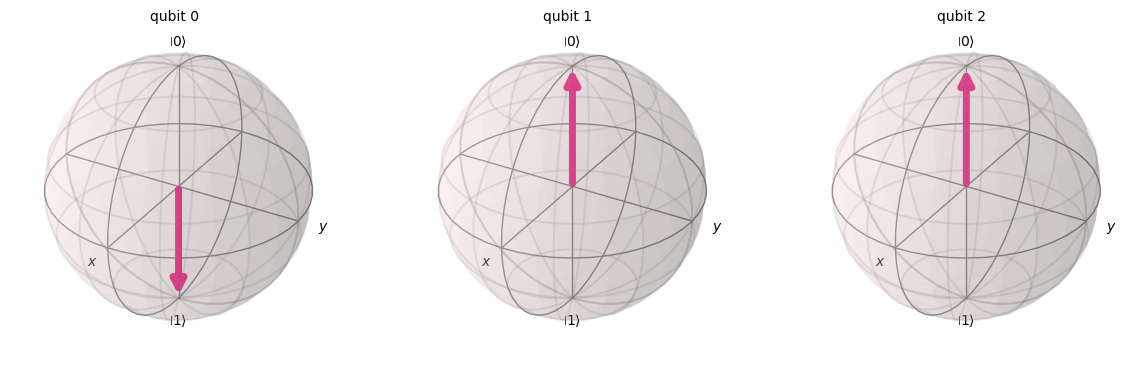

In [ ]:
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector

simulator = Aer.get_backend('statevector_simulator')

new_circuit = transpile(qc, simulator)
job = simulator.run(new_circuit)
result = job.result()

statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

### 2. Amplitude Encoding

**Amplitude Encoding** uses the amplitudes of quantum states to represent classical data. This method can encode a large amount of data into the amplitudes of a quantum state using fewer qubits.

**Example**: For a classical data vector `[a, b, c, d]`, you can encode it into a single quantum state:
\[ |ψ⟩ = a|00⟩ + b|01⟩ + c|10⟩ + d|11⟩ \]

**Advantages**:
- Efficient in terms of the number of qubits needed.
- Suitable for large datasets.

**Disadvantages**:
- Preparing the quantum state with specific amplitudes can be complex.
- Requires normalization of the classical data.

In [ ]:
from math import sqrt

X = [4, 5]
# Normalize vector
norm_X = [4 / sqrt(41), 5 / sqrt(41)]
print('Normalized Vector:', norm_X)

Normalized Vector: [0.6246950475544243, 0.7808688094430304]


In [ ]:
qc = QuantumCircuit(1)
qc.initialize(norm_X)

print(qc)

   ┌────────────────────────────┐
q: ┤ Initialize(0.6247,0.78087) ├
   └────────────────────────────┘


Statevector([0.62469505+0.j, 0.78086881+0.j],
            dims=(2,))


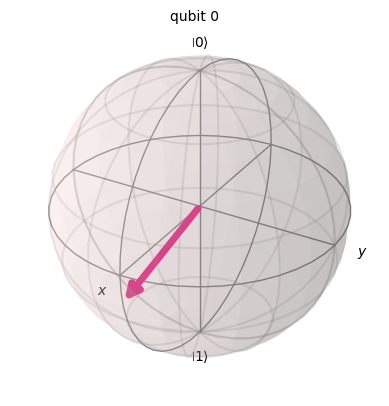

In [ ]:
simulator = Aer.get_backend('statevector_simulator')

new_circuit = transpile(qc, simulator)
job = simulator.run(new_circuit)
result = job.result()

statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

## Explanation of the following circuit and create it using python


This part explains the above quantum circuit.

In a quantum circuit, normal lines represent qubits and double lines represent classical bits. Here, we have two qubits, q0 and q1, and a classical bit, c. Let's examine the operations on each bit separately.

For q0, two consecutive Hadamard gates are applied. Since two adjacent H gates have the same effect as no operation, no change occurs to the q0 qubit.

For q1, an X gate is followed by a Hadamard gate and another X gate. The X gate (not gate) is applied first, followed by the Hadamard gate, and finally another X gate.

A barrier is placed between the gates and the components afterward. The barrier prevents the transpiler from combining certain gates or circuit elements and doesn't affect the outcome, treating different parts of the circuit as separate.

Lastly, a measurement gate is placed on the q0 qubit. Measurement gates convert qubits into their post-measurement states, with outcomes loaded onto the classical bits they point to. Here, q0's state is converted into a classical bit and the result is loaded into the classical bit c.

Now we are ready to build this circuit using the mentioned components.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister

# Create q0 and q1 qubits and classical bit c
q0 = QuantumRegister(1, 'q0')
q1 = QuantumRegister(1, 'q1')
c = ClassicalRegister(1, 'c')

qc = QuantumCircuit(q0, q1, c)
qc.h(q0)
qc.h(q0)
qc.x(q1)
qc.h(q1)
qc.x(q1)
qc.barrier()
qc.measure(q0, c)
print(qc)

     ┌───┐┌───┐      ░ ┌─┐
 q0: ┤ H ├┤ H ├──────░─┤M├
     ├───┤├───┤┌───┐ ░ └╥┘
 q1: ┤ X ├┤ H ├┤ X ├─░──╫─
     └───┘└───┘└───┘ ░  ║ 
c: 1/═══════════════════╩═
                        0 
